In [22]:
import numpy as np

In [51]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X_iris = iris.data[:, 1:] # petal length & width
y_iris = iris.target

In [52]:
X_iris.shape

(150, 3)

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X_iris)

In [54]:
pca.components_

array([[-0.09720038,  0.91735023,  0.38603191],
       [ 0.98648534,  0.03739575,  0.15952504]])

In [55]:
pca.components_.shape

(2, 3)

In [56]:
pca.explained_variance_ratio_

array([ 0.95087157,  0.04035684])

In [57]:
pca = PCA()
pca.fit(X_iris)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

pca = PCA(n_components=d)
X_iris_reduced = pca.fit_transform(X)

In [58]:
X_iris_reduced.shape

(150, 1)

In [26]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
X_mnist, y_mnist = mnist['data'], mnist['target']

In [27]:
pca = PCA()
pca.fit(X_mnist)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

pca = PCA(n_components=d)
X_mnist_reduced = pca.fit_transform(X_mnist)

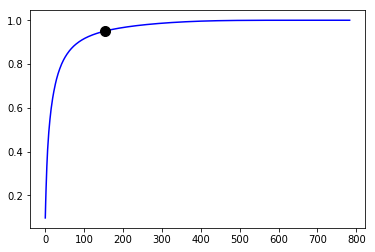

In [41]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(cumsum, 'b-')
plt.plot(d, cumsum[d], 'ko', markersize=10.0)
plt.show()

In [44]:
X_mnist_recovered = pca.inverse_transform(X_mnist_reduced)
X_mnist_recovered.shape

(70000, 784)

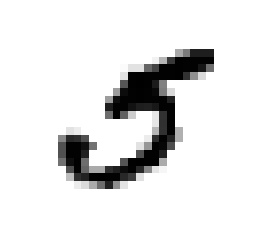

In [45]:
d_original = X_mnist[36000].reshape(28, 28)

plt.imshow(d_original, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

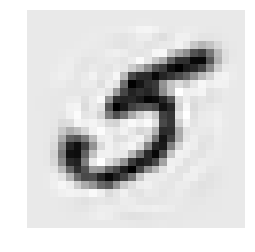

In [46]:
d_recovered = X_mnist_recovered[36000].reshape(28, 28)

plt.imshow(d_recovered, cmap = matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [47]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_mnist, n_batches):
    inc_pca.partial_fit(X_batch)

X_mnist_reduced = inc_pca.transform(X_mnist)


In [50]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")

X_mnist_reduced = rnd_pca.fit_transform(X_mnist)

In [59]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_iris_reduced = rbf_pca.fit_transform(X_iris)

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_iris, y_iris)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRegre...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kpca__gamma': array([ 0.03   ,  0.03222,  0.03444,  0.03667,  0.03889,  0.04111,
        0.04333,  0.04556,  0.04778,  0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [67]:
grid_search.best_estimator_

Pipeline(steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=0.034444444444444444, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [69]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.3444, fit_inverse_transform=True)
X_iris_reduced = rbf_pca.fit_transform(X_iris)
X_preimage = rbf_pca.inverse_transform(X_iris_reduced)

In [70]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X_iris, X_preimage)

0.082852762322323581

In [73]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_iris_reduced = lle.fit_transform(X_iris)

0.082852762322323581